## Final Project Submission

Please fill out: 
* Student name: NORAH NANJALA OLUOCH
* Student pace: self paced / part time / full time: PART TIME
* Scheduled project review date/time: 
* Instructor name: MR SAMUEL KARU
* Blog post URL:


## OVERVIEW
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.
Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world approximating 151,000 and 575,000 deaths

Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity.


### BUSINESS UNDERSTANDING: H1N1 AND SEASONAL FLU VACCINES
H1NI is used to prevent infection caused by the influenza A virus and Seasonal Flu vaccines protect against the four influenza viruses.
As of the launch of vaccine competition, vaccines for the COVID-19 virus are still under development and not yet available. 
A National Flu survey was conducted by United States in 2009, survey asked respondents whether they had received the H1N1 and seasonal flu vaccines the questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission.The potential target is whether the respondents received H1N1 flu vaccine.  

### PROBLEM STATEMENT
Using data collected in the National 2009 H1N1 Flu Survey, the problem is to predict whether people got H1N1 and seasonal flu vacine.
The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. The potential target is whether the respondents received H1N1 flu vaccine.

### OBJECTIVES
1. To predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?
2. To identify whether the survey respondent received H1N1 flu vaccine.
3. To evaluate the perfomance of the model/respondents ()

## DATA UNDERSTANDING
The source of data is using data collected in the National 2009 H1N1 Flu Survey in United States.

## IMPORTS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


### EDA

In [3]:
file_paths = r'C:\Users\admin\Desktop\Project_Phase_3_\data_csv\training_set_labels.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_paths)
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [108]:
# basic information bout the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [4]:
# summary statistis of the dataset
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [5]:
#check for missing values
df.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

#### Data preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df.fillna(df.median(), inplace=True)


# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Separate features and target variable
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = df['h1n1_vaccine']
y_seasonal = df['seasonal_vaccine']

# Split the data into training and test sets
X_train, X_test, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.3, random_state=42)
X_train, X_test, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.3, random_state=42)

### Modeling

In [7]:
# Create a pipeline with preprocessing and model
pipeline_h1n1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))  # liblinear is good for small datasets
])

# Train the model
pipeline_h1n1.fit(X_train, y_train_h1n1)

# Predict on test data
y_pred_h1n1 = pipeline_h1n1.predict(X_test)

# Evaluate the model
print(classification_report(y_test_h1n1, y_pred_h1n1))
print("ROC AUC Score (H1N1):", roc_auc_score(y_test_h1n1, y_pred_h1n1))


pipeline_seasonal = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

pipeline_seasonal.fit(X_train, y_train_seasonal)
y_pred_seasonal = pipeline_seasonal.predict(X_test)

print(classification_report(y_test_seasonal, y_pred_seasonal))
print("ROC AUC Score (Seasonal):", roc_auc_score(y_test_seasonal, y_pred_seasonal))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6319
           1       0.00      0.00      0.00      1694

    accuracy                           0.79      8013
   macro avg       0.39      0.50      0.44      8013
weighted avg       0.62      0.79      0.70      8013

ROC AUC Score (H1N1): 0.5
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      4342
           1       0.00      0.00      0.00      3671

    accuracy                           0.54      8013
   macro avg       0.27      0.50      0.35      8013
weighted avg       0.29      0.54      0.38      8013

ROC AUC Score (Seasonal): 0.5


c:\Users\admin\anaconda\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model evalution

In [8]:
# Cross-validation for H1N1 vaccine model
cv_scores_h1n1 = cross_val_score(pipeline_h1n1, X, y_h1n1, cv=5, scoring='roc_auc')
print("Cross-Validation ROC AUC Scores (H1N1):", cv_scores_h1n1)
print("Mean Cross-Validation ROC AUC Score (H1N1):", cv_scores_h1n1.mean())

# Cross-validation for Seasonal vaccine model
cv_scores_seasonal = cross_val_score(pipeline_seasonal, X, y_seasonal, cv=5, scoring='roc_auc')
print("Cross-Validation ROC AUC Scores (Seasonal):", cv_scores_seasonal)
print("Mean Cross-Validation ROC AUC Score (Seasonal):", cv_scores_seasonal.mean())

Cross-Validation ROC AUC Scores (H1N1): [0.50833339 0.51985688 0.52246005 0.50754743 0.50000377]
Mean Cross-Validation ROC AUC Score (H1N1): 0.5116403041304727
Cross-Validation ROC AUC Scores (Seasonal): [0.51636876 0.50864594 0.52189817 0.52055115 0.50026515]
Mean Cross-Validation ROC AUC Score (Seasonal): 0.5135458353569277


#### Visualization

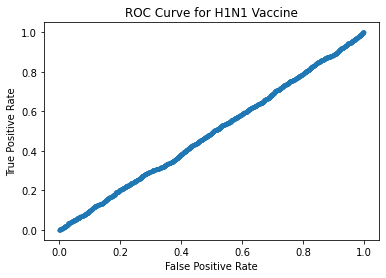

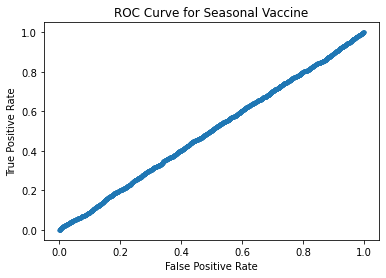

In [9]:
from sklearn.metrics import roc_curve

# H1N1 ROC curve
fpr_h1n1, tpr_h1n1, _ = roc_curve(y_test_h1n1, pipeline_h1n1.predict_proba(X_test)[:,1])
plt.plot(fpr_h1n1, tpr_h1n1, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for H1N1 Vaccine')
plt.show()

# Seasonal ROC curve
fpr_seasonal, tpr_seasonal, _ = roc_curve(y_test_seasonal, pipeline_seasonal.predict_proba(X_test)[:,1])
plt.plot(fpr_seasonal, tpr_seasonal, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Seasonal Vaccine')
plt.show()

#### Insights
Both vaccines predicted ROC AUC of 0.5 indicating that the models are not effectively distinguishing between classes.
The features used may not be informative or relevant for predicting vaccine uptake.

#### Confusion matrix

In [10]:
# Preprocessing
X = df.drop('h1n1_vaccine', axis=1)  # Features
y = df['h1n1_vaccine']  # Target

# Convert categorical variables to numerical
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
print(importances)


[[5219 1100]
 [1126  568]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6319
           1       0.34      0.34      0.34      1694

    accuracy                           0.72      8013
   macro avg       0.58      0.58      0.58      8013
weighted avg       0.72      0.72      0.72      8013

[0.85640166 0.14359834]


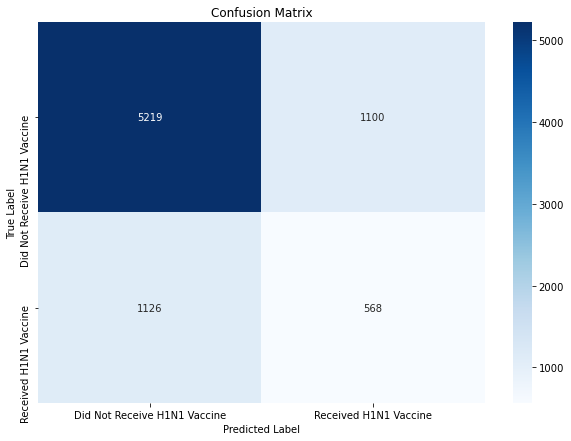

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6319
           1       0.34      0.34      0.34      1694

    accuracy                           0.72      8013
   macro avg       0.58      0.58      0.58      8013
weighted avg       0.72      0.72      0.72      8013



In [11]:
#compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Receive H1N1 Vaccine', 'Received H1N1 Vaccine'],
            yticklabels=['Did Not Receive H1N1 Vaccine', 'Received H1N1 Vaccine'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optionally, print the classification report
print(classification_report(y_test, y_pred))

## Insights and recommendations
True Positives (TP): The number of people correctly predicted to have received the H1N1 vaccine. (568)

True Negatives (TN): The number of people correctly predicted not to have received the H1N1 vaccine. (5219)

False Positives (FP): The number of people incorrectly predicted to have received the vaccine but did not. (1100)

False Negatives (FN): The number of people incorrectly predicted not to have received the vaccine but did. (1126)

Precision: 0.34

Of all the instances predicted as class 1, 34% were actually class 1.
The model is less accurate at identifying individuals who received the vaccine when it predicts them as such.

Recall: 0.34

Of all the actual class 1 instances, 34% were correctly predicted as class 1.
The model misses a significant portion of actual vaccine recipients, indicating low sensitivity for this class.

F1-score: 0.34

The harmonic mean of precision and recall for class 1.
The model's performance for class 1 is weak, with a low balance between precision and recall.


### Model perfomance
The model performs well in identifying class 0(respondets who did not receive H1N1) but poorly in identifying class 1(respondents who received H1N1). This suggests an imbalance between classes, where the model is biased towards the majority class (class 0).

### Recommendation
Address class imbalance using techniques like resampling (e.g., SMOTE for oversampling the minority class or random undersampling of the majority class), adjusting class weights, or using algorithms designed to handle imbalanced data.

## FINAL
DECISION TREE MODEL PERFOMS BETTER THAN LOGISTIC REGRESSION